# Facies Classification using Machine Learning

## Table of contents
1. [Introduction](#introduction)
2. [Exploring the Data](#exploringdata)
3. [Learning Baseline](#learningbaseline)
4. [Learning](#learning)
5. [Validation](#validation)

## Exploring the data <a name="exploringdata">

In [74]:
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline

well_log = pd.read_csv('data/training_data.csv')

In [75]:
well_log.head(10)

,Facies,Formation,Well Name,Depth,GR,ILD_log10,DeltaPHI,PHIND,PE,NM_M,RELPOS
0,3,A1 SH,SHRIMPLIN,2793.0,77.45,0.664,9.9,11.915,4.6,1,1.000
1,3,A1 SH,SHRIMPLIN,2793.5,78.26,0.661,14.2,12.565,4.1,1,0.979
2,3,A1 SH,SHRIMPLIN,2794.0,79.05,0.658,14.8,13.050,3.6,1,0.957
3,3,A1 SH,SHRIMPLIN,2794.5,86.10,0.655,13.9,13.115,3.5,1,0.936
4,3,A1 SH,SHRIMPLIN,2795.0,74.58,0.647,13.5,13.300,3.4,1,0.915
5,3,A1 SH,SHRIMPLIN,2795.5,73.97,0.636,14.0,13.385,3.6,1,0.894
6,3,A1 SH,SHRIMPLIN,2796.0,73.72,0.630,15.6,13.930,3.7,1,0.872
7,3,A1 SH,SHRIMPLIN,2796.5,75.65,0.625,16.5,13.920,3.5,1,0.830
8,3,A1 SH,SHRIMPLIN,2797.0,73.79,0.624,16.2,13.980,3.4,1,0.809
9,3,A1 SH,SHRIMPLIN,2797.5,76.89,0.615,16.9,14.220,3.5,1,0.787


In [3]:
well_log.groupby("Well Name")["PE"].mean()

Well Name
CHURCHMAN BIBLE    3.789926
CROSS H CATTLE     3.325852
LUKE G U           3.660705
NEWBY              3.771706
NOLAN              3.857947
Recruit F9         5.460735
SHANKLE            3.224944
SHRIMPLIN          4.219958
Name: PE, dtype: float64

In [4]:
well_log.describe()

,Facies,Depth,GR,ILD_log10,DeltaPHI,PHIND,PE,NM_M,RELPOS
count,3232.000000,3232.000000,3232.000000,3232.000000,3232.000000,3232.000000,3232.000000,3232.000000,3232.000000
mean,4.422030,2875.824567,66.135769,0.642719,3.559642,13.483213,3.725014,1.498453,0.520287
std,2.504243,131.006274,30.854826,0.241845,5.228948,7.698980,0.896152,0.500075,0.286792
min,1.000000,2573.500000,13.250000,-0.025949,-21.832000,0.550000,0.200000,1.000000,0.010000
25%,2.000000,2791.000000,46.918750,0.492750,1.163750,8.346750,3.100000,1.000000,0.273000
50%,4.000000,2893.500000,65.721500,0.624437,3.500000,12.150000,3.551500,1.000000,0.526000
75%,6.000000,2980.000000,79.626250,0.812735,6.432500,16.453750,4.300000,2.000000,0.767250
max,9.000000,3122.500000,361.150000,1.480000,18.600000,84.400000,8.094000,2.000000,1.000000


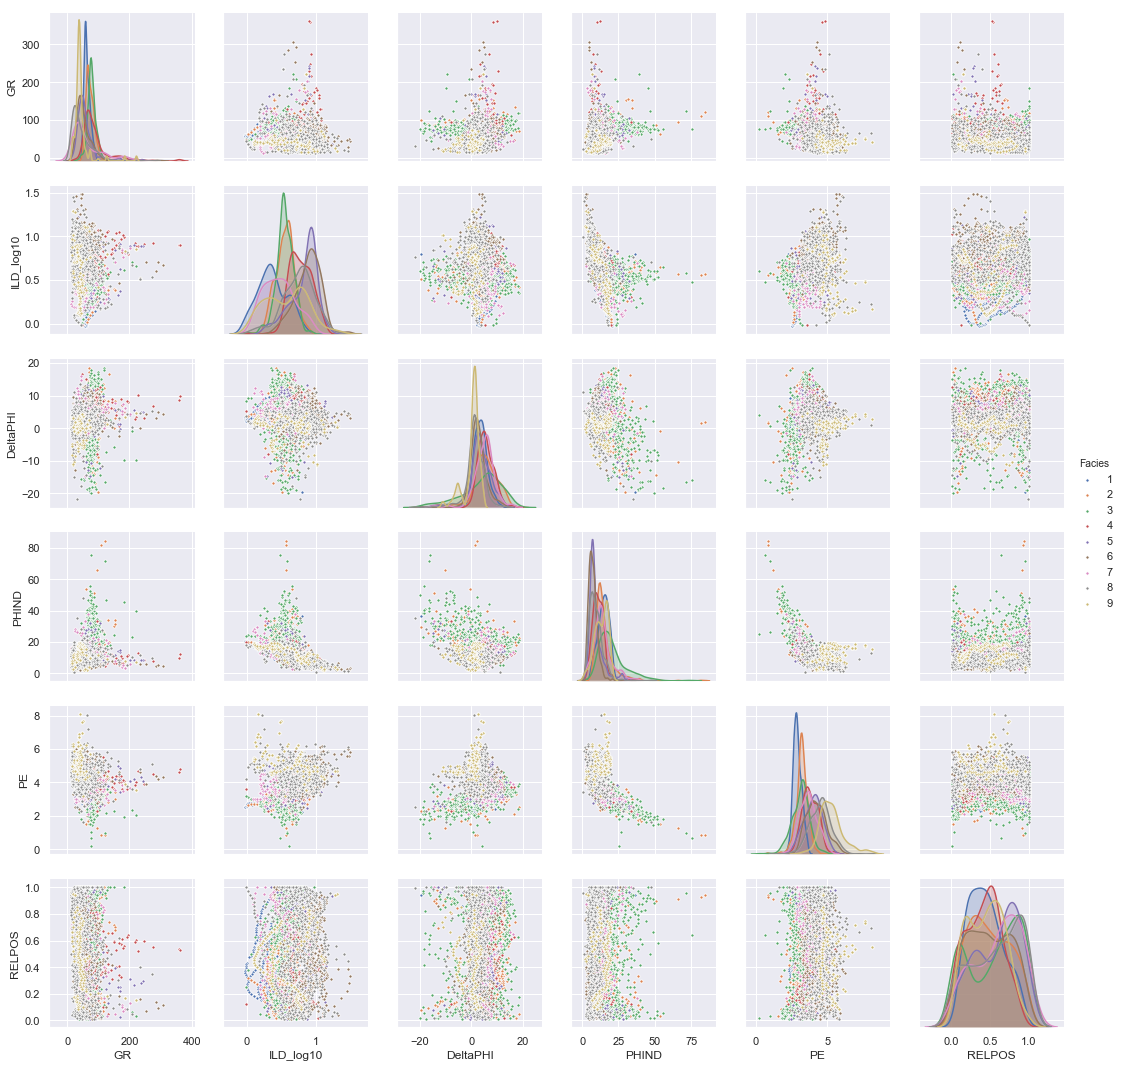

In [48]:
import seaborn as sns

data_columns = [label for label in list(well_log.columns) if label not in ('Well Name','Facies','Formation', 'Depth')]

plot_columns = [label for label in list(well_log.columns) if label not in ('Formation', 'Well Name','Facies', 'Depth', 'NM_M')]

sns.pairplot(well_log, hue = 'Facies', vars = plot_columns, diag_kind = 'kde', plot_kws = {'s':10})

['SHRIMPLIN', 'SHANKLE', 'LUKE', 'CROSS', 'NOLAN', 'Recruit', 'NEWBY', 'CHURCHMAN']


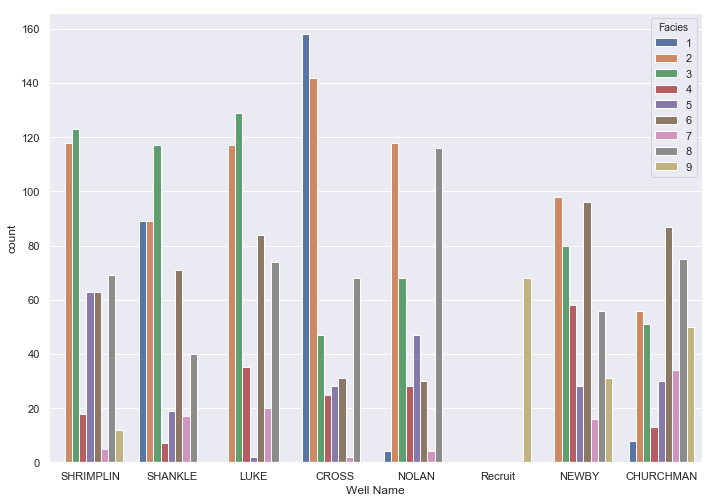

In [49]:
sns.set(rc={'figure.figsize':(11.7,8.27)})
well_names = list(well_log['Well Name'].unique())
well_first_name = [wellname.split()[0] for wellname in well_names]
print(well_first_name)
ax = sns.countplot(x='Well Name', hue='Facies', data=well_log)
ax = ax.set_xticklabels(well_first_name)
#ax.xlabel([])
#Only use the first word of the data (split on space) to make the plot look nice

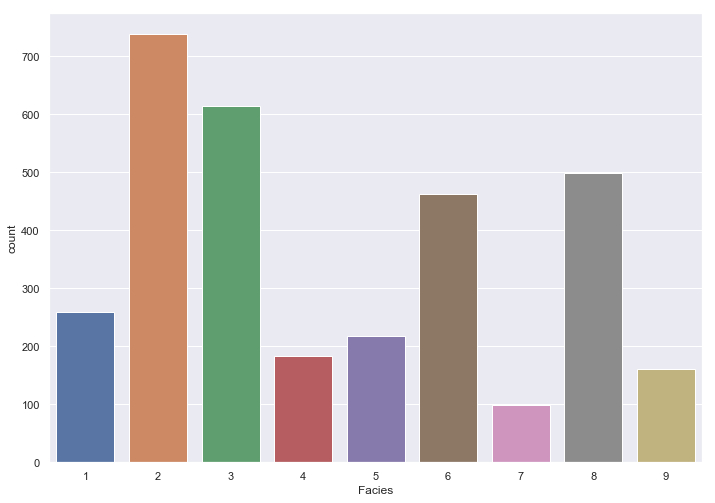

In [50]:
ax = sns.countplot(x='Facies', data=well_log)

In [51]:
well_log.columns

Index(['Facies', 'Formation', 'Well Name', 'Depth', 'GR', 'ILD_log10',
       'DeltaPHI', 'PHIND', 'PE', 'NM_M', 'RELPOS'],
      dtype='object')

In [52]:
data_columns

['GR', 'ILD_log10', 'DeltaPHI', 'PHIND', 'PE', 'NM_M', 'RELPOS']

## Learning baseline <a name="learningbaseline">

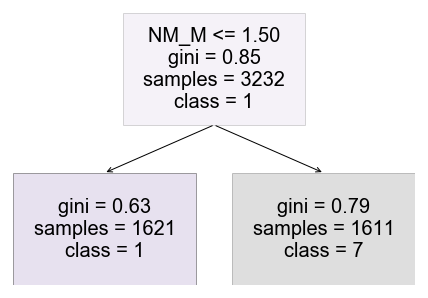

In [53]:
from sklearn import tree
from dtreeplt import dtreeplt

from sklearn import preprocessing


X = well_log[data_columns]
Y = well_log['Facies']

"""le = preprocessing.LabelEncoder()
le.fit(well_log['Formation'])

X['Formation'] = le.transform(well_log['Formation'])"""

model = tree.DecisionTreeClassifier(max_depth=1)
dt_fit = model.fit(X,Y)

dtree = dtreeplt(
    filled=True,
    model=model,
    feature_names=data_columns,
    target_names=list(range(9)),
    disp_values=False
)

fig = dtree.view()

In [54]:
from sklearn.metrics import f1_score

ytest_predict = model.predict(X)

f1_score(Y, ytest_predict, average='micro')

0.37685643564356436

In [55]:
from sklearn import preprocessing
X_scaled = preprocessing.scale(X)
X_scaled_df =pd.DataFrame(X_scaled, columns=X.columns)
X_scaled_df['Facies'] = Y

C:\Users\gushi\Anaconda3\envs\env_full\lib\site-packages\ipykernel_launcher.py:2: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by the scale function.
  


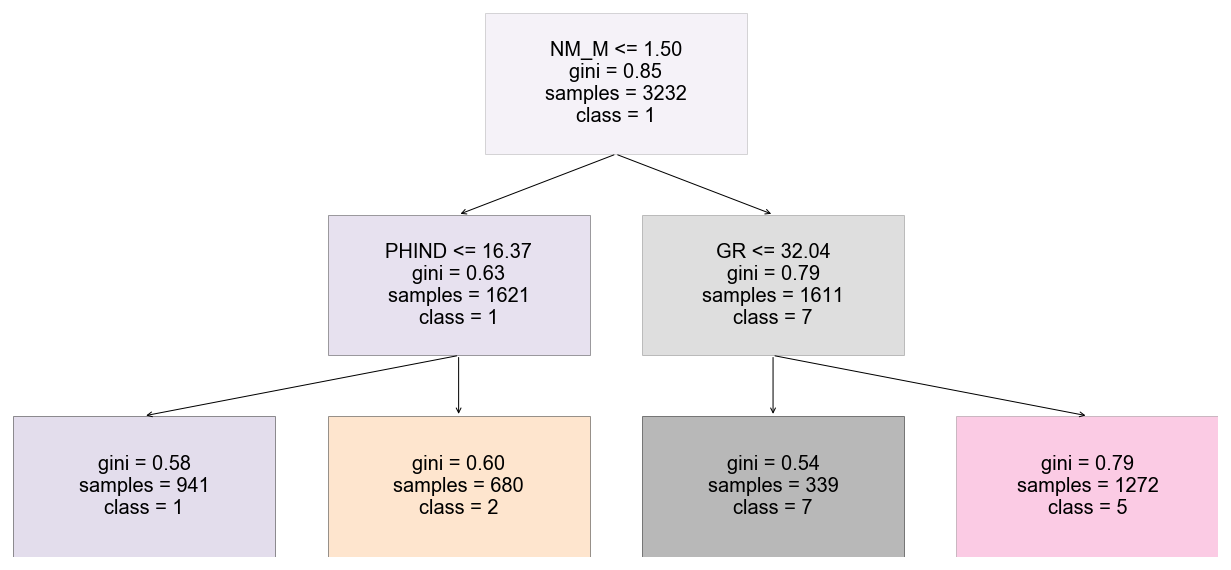

In [56]:
from sklearn.tree import DecisionTreeClassifier
from dtreeplt import dtreeplt

model = DecisionTreeClassifier(max_depth=2)
dt_fit = model.fit(X,Y)

dtree = dtreeplt(
    filled=True,
    model=model,
    feature_names=data_columns,
    target_names=list(range(9)),
    disp_values=False
)

fig = dtree.view()

## Learning <a name="learning">

Now we move on to a full learning example

In [57]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.1, random_state=1)

C:\Users\gushi\Anaconda3\envs\env_full\lib\site-packages\sklearn\model_selection\_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)
C:\Users\gushi\Anaconda3\envs\env_full\lib\site-packages\sklearn\model_selection\_search.py:271: UserWarning: The total space of parameters 7 is smaller than n_iter=10. Running 7 iterations. For exhaustive searches, use GridSearchCV.
  % (grid_size, self.n_iter, grid_size), UserWarning)


0.6024759284731774
DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=9,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=1,
            splitter='best')


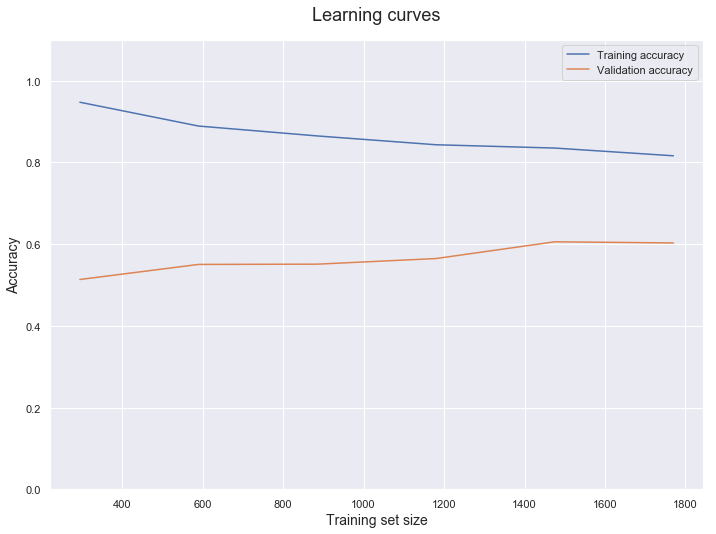

In [58]:
"""
This is the ExtraTreesClassifier

"""
from sklearn.ensemble import ExtraTreesClassifier
from sklearn import model_selection
from sklearn.model_selection import learning_curve

from joblib import Memory
location = './cachedir'
memory = Memory(location, verbose=0)

train_sizes = list(range(295,2065,295))

def tv_scores_mean(estimator, X, y, train_sizes, scoring='accuracy', shuffle=True, cv=5):
    train_sizes, train_scores, validation_scores = learning_curve(estimator = estimator, X=X, y=y, 
                                                                  train_sizes=train_sizes, scoring=scoring, 
                                                                  shuffle=shuffle, cv=cv)
    train_scores_mean = train_scores.mean(axis = 1)
    validation_scores_mean = validation_scores.mean(axis = 1)
    return train_sizes, train_scores_mean, validation_scores_mean

def plot_learning_curve(train_sizes, train_scores_mean, validation_scores_mean):
    plt.plot(train_sizes, train_scores_mean, label = 'Training accuracy')
    plt.plot(train_sizes, validation_scores_mean, label = 'Validation accuracy')
    plt.ylabel('Accuracy', fontsize = 14)
    plt.xlabel('Training set size', fontsize = 14)
    plt.title('Learning curves', fontsize = 18, y = 1.03)
    plt.legend()
    plt.ylim(0,1.1)

def randomizedsearch_helper(grid, estimator, X, y):
    gridsearch = model_selection.RandomizedSearchCV(estimator = estimator, param_distributions=grid)
    gridsearch.fit(X,y)
    return (gridsearch.best_estimator_, gridsearch.best_score_, gridsearch.best_params_)

def model_helper(grid, classifier, X, y, randomsearch = True):
    if randomsearch:
        est, acc, param = randomizedsearch_helper(grid, classifier, X, y)
    else:
        est, acc, param = gridsearch_helper(grid, classifier, X, y)
    est.fit(X_train,y_train)
    print(acc)
    print(est)
    return (est, acc, param)

cart_grid = {'max_depth' : range(3,10)}
result = model_helper(cart_grid, DecisionTreeClassifier(random_state=1), X_train, y_train)
cart_est = result[0]

plot_learning_curve(*tv_scores_mean(cart_est,X_train,y_train,train_sizes))

C:\Users\gushi\Anaconda3\envs\env_full\lib\site-packages\sklearn\model_selection\_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)


0.6966987620357634
ExtraTreesClassifier(bootstrap=False, class_weight=None, criterion='gini',
           max_depth=11, max_features=None, max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=15, n_jobs=None,
           oob_score=False, random_state=1, verbose=0, warm_start=False)


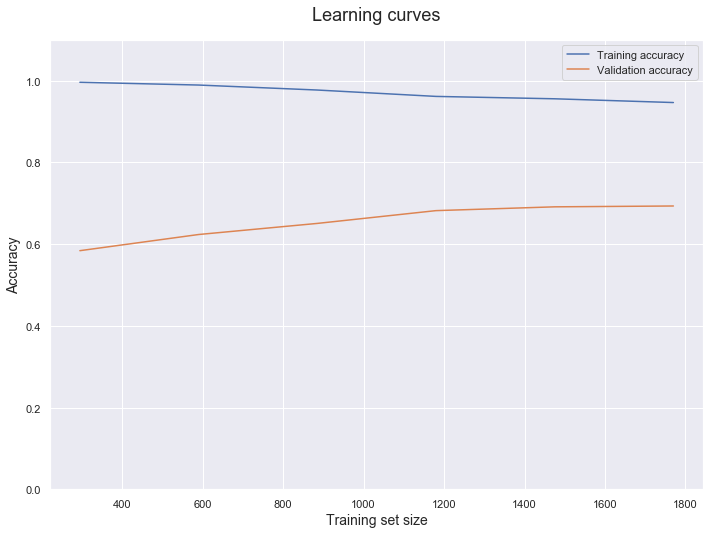

In [59]:
etc_grid = {'n_estimators' : range(5,20,5), 'max_depth' : range(3,13),
            'max_features':["auto","log2",None], 'warm_start':[True, False]}
result = model_helper(etc_grid, ExtraTreesClassifier(random_state=1), X_train, y_train)
etc_est = result[0]

plot_learning_curve(*tv_scores_mean(etc_est,X_train,y_train,train_sizes))

C:\Users\gushi\Anaconda3\envs\env_full\lib\site-packages\sklearn\model_selection\_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)
C:\Users\gushi\Anaconda3\envs\env_full\lib\site-packages\sklearn\ensemble\forest.py:308: UserWarning: Warm-start fitting without increasing n_estimators does not fit new trees.
  warn("Warm-start fitting without increasing n_estimators does not "


0.6788170563961485
RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=9, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=180, n_jobs=None,
            oob_score=False, random_state=1, verbose=0, warm_start=True)


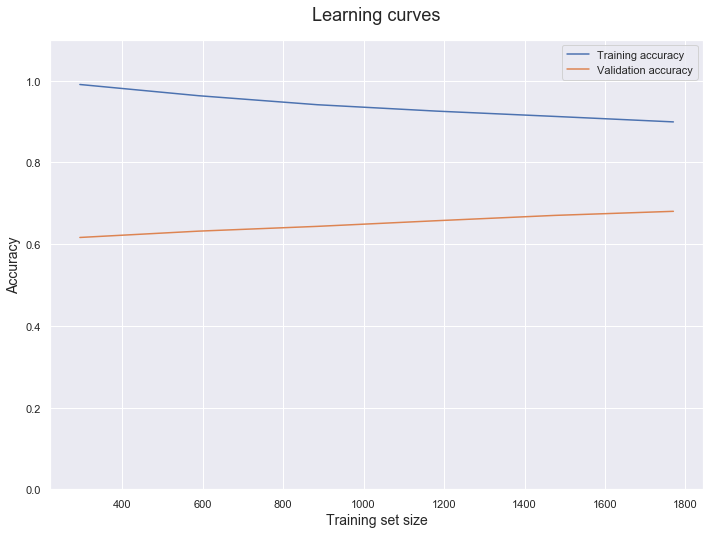

In [60]:
from sklearn.ensemble import RandomForestClassifier

rfc_grid = {'n_estimators' : range(20, 200, 20), 'max_depth': range(3,10), 'max_features':["auto","log2",None], 'warm_start':[True, False]}
result = model_helper(rfc_grid, RandomForestClassifier(random_state=1), X_train, y_train)
knn_est = result[0]
plot_learning_curve(*tv_scores_mean(knn_est,X_train,y_train,train_sizes))

C:\Users\gushi\Anaconda3\envs\env_full\lib\site-packages\sklearn\model_selection\_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)


0.671939477303989
GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.05, loss='deviance', max_depth=3,
              max_features=None, max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=6, min_samples_split=4,
              min_weight_fraction_leaf=0.0, n_estimators=250,
              n_iter_no_change=None, presort='auto', random_state=1,
              subsample=0.4, tol=0.0001, validation_fraction=0.1,
              verbose=0, warm_start=False)


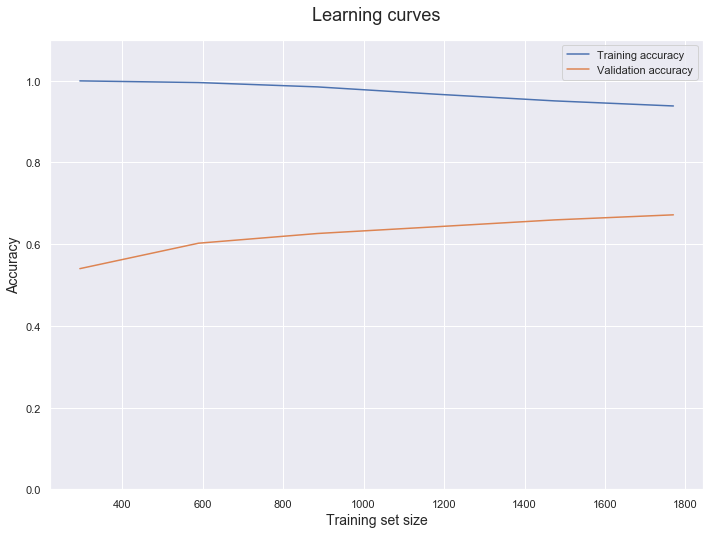

In [61]:
from sklearn.ensemble import GradientBoostingClassifier


rfc_grid = {'n_estimators' : range(100,300,50), 'min_samples_leaf': [6], 
            'min_samples_split':range(2,10,2), 'learning_rate':[0.03, 0.04, 0.05], 
            'subsample':[0.4, 0.6], 'max_depth':range(2,4,1)}


#Try n_estimators higher after this one 

def train_gbc(X_train, y_train, rfc_grid):
    result = model_helper(rfc_grid, GradientBoostingClassifier(random_state=1), X_train, y_train)
    gbc_est = result[0]
    plot_learning_curve(*tv_scores_mean(gbc_est,X_train,y_train,train_sizes))
    return gbc_est


gbc_est = train_gbc(X_train, y_train, rfc_grid)

In [62]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(gbc_est, X_train, y_train, cv=5, scoring='f1_micro')

In [63]:
scores

array([0.65924658, 0.68610635, 0.66494845, 0.69018933, 0.66782007])

In [64]:
gbc_est = GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.05, loss='deviance', max_depth=3,
              max_features=None, max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=6, min_samples_split=4,
              min_weight_fraction_leaf=0.0, n_estimators=250,
              n_iter_no_change=None, presort='auto', random_state=1,
              subsample=0.4, tol=0.0001, validation_fraction=0.1,
              verbose=0, warm_start=False)

gbc_est = gbc_est.fit(X_train, y_train)

## Validation <a name="validation">

In [68]:
import numpy as np

blind_data = pd.read_csv('data/validation_data_nofacies.csv')

X_blind = blind_data.drop(['Formation', 'Well Name', 'Depth'], axis=1).values
well_blind = blind_data['Well Name'].values
depth_blind = blind_data['Depth'].values



"""X = np.delete(X, padded_rows, axis=0)
y = np.delete(y, padded_rows, axis=0) 

X_blind, padded_rows = augment_features(X_blind, well_blind, depth_blind, N_neig=1)"""

'X = np.delete(X, padded_rows, axis=0)\ny = np.delete(y, padded_rows, axis=0) \n\nX_blind, padded_rows = augment_features(X_blind, well_blind, depth_blind, N_neig=1)'

In [82]:
from sklearn.multiclass import OneVsOneClassifier

print('.' * 100)
y_pred = []
for seed in range(100):
    np.random.seed(seed)

    clf = GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.05, loss='deviance', max_depth=3,
              max_features=None, max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=6, min_samples_split=4,
              min_weight_fraction_leaf=0.0, n_estimators=250,
              n_iter_no_change=None, presort='auto', random_state = seed,
              subsample=0.4, tol=0.0001, validation_fraction=0.1,
              verbose=0, warm_start=False)

    clf.fit(X_train, y_train)
    y_blind = clf.predict(X_blind)
    #y_blind = medfilt(y_blind, kernel_size=5)
    y_pred.append(y_blind)
    print('|', end='')

np.save('PA-Team_100_realizations.npy', y_pred)

....................................................................................................
||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||

In [83]:
PRED = pd.read_csv('data/prediction_depths.csv')
PRED.set_index(["Well Name", "Depth"], inplace=True)
PRED.head()

Unnamed: 0
Well Name Depth             
STUART    2808.0           0
          2808.5           1
          2809.0           2
          2809.5           3
          2810.0           4

In [84]:
TRUE = pd.read_csv('data/blind_stuart_crawford_core_facies.csv')
TRUE.rename(columns={'Depth.ft': 'Depth'}, inplace=True)
TRUE.rename(columns={'WellName': 'Well Name'}, inplace=True)
TRUE.set_index(["Well Name", "Depth"], inplace=True)
TRUE.head()

LithCode     LithLabel
Well Name Depth                         
STUART    2807.5         3  NM Shly Silt
          2808.0         3  NM Shly Silt
          2808.5         3  NM Shly Silt
          2809.0         3  NM Shly Silt
          2809.5         3  NM Shly Silt

In [101]:
from sklearn.metrics import confusion_matrix

def get_accuracies(y_preds):
    """
    Get the F1 scores from all the y_preds.
    y_blind is a 1D array. y_preds is a 2D array.
    """
    accs = []
    for y_pred in y_preds:
        PRED['Facies'] = y_pred
        all_data = PRED.join(TRUE, how='inner')
        y_blind = all_data['LithCode'].values
        y_pred = all_data['Facies'].values
        y_pred = y_pred[y_blind!=11]
        y_blind = y_blind[y_blind!=11]
        cv_conf = confusion_matrix(y_blind, y_pred)
        print(cv_conf)
        #sns.heatmap(cv_conf, annot=True, fmt="d")
        accs.append(accuracy(cv_conf))
    return np.array(accs)

[[  5   9   0   0   0   0   0   0   0]
 [ 10  87   9   0   0   1   0   4   0]
 [  3  63  51   0   0   0   0  12   0]
 [ 10   0   0  49   0  25   2   1   0]
 [  0   0   1   7  15  16   2  14   0]
 [  0   2   4   7  16  67   5  58   7]
 [  0   1   0  11   3   8  44  25   0]
 [  0   4   4   0   5  17   6 103   1]
 [  0   0   0   0   0   0   0   3   3]]
[[  6   8   0   0   0   0   0   0   0]
 [ 13  85   8   0   0   1   0   4   0]
 [  1  64  52   0   0   0   0  12   0]
 [ 10   0   0  52   1  22   0   2   0]
 [  0   0   1  10  15  18   0  11   0]
 [  0   1   5   6  15  70   1  62   6]
 [  0   1   1  11   5   7  43  24   0]
 [  0   4   3   1   3  19   7 102   1]
 [  0   0   0   0   0   0   0   3   3]]
[[  8   6   0   0   0   0   0   0   0]
 [ 10  89   7   0   0   1   0   4   0]
 [  3  59  55   0   0   0   0  12   0]
 [ 10   0   0  42   0  29   3   3   0]
 [  0   0   1   7  15  18   2  12   0]
 [  0   1   5   7  15  64   5  61   8]
 [  0   1   0   5   5   6  49  26   0]
 [  0   4   4   0   5  

[[  8   6   0   0   0   0   0   0   0]
 [ 10  90   6   0   0   1   0   4   0]
 [  3  59  55   0   0   0   0  12   0]
 [ 10   0   0  48   0  27   1   1   0]
 [  0   0   1   9  13  19   0  13   0]
 [  0   1   5   5  14  66   1  67   7]
 [  0   1   1  24   3   7  32  24   0]
 [  0   3   5   0   6  16   8 101   1]
 [  0   0   0   0   0   0   0   3   3]]
[[  5   9   0   0   0   0   0   0   0]
 [  6  92   8   0   0   1   0   4   0]
 [  3  64  50   0   0   0   0  12   0]
 [ 10   0   0  51   0  22   2   2   0]
 [  0   0   1   8  14  17   2  13   0]
 [  0   2   4   7  14  66   5  62   6]
 [  0   1   0  23   5   7  31  25   0]
 [  0   5   3   0   6  12   6 107   1]
 [  0   0   0   0   0   0   0   3   3]]
[[  6   8   0   0   0   0   0   0   0]
 [ 11  90   5   0   0   1   0   4   0]
 [  4  60  53   0   0   0   0  12   0]
 [ 10   0   0  47   0  27   2   1   0]
 [  0   0   1   8  15  17   0  14   0]
 [  0   1   5   5  15  68   3  64   5]
 [  0   1   1  18   3   8  34  27   0]
 [  1   5   3   1   2  

[[  4  10   0   0   0   0   0   0   0]
 [  7  94   5   0   0   1   0   4   0]
 [  3  61  53   0   0   0   0  12   0]
 [ 10   0   0  45   1  28   1   2   0]
 [  0   0   1   7  16  20   0  11   0]
 [  0   4   4   7  14  65   4  63   5]
 [  0   1   1  18   5   6  36  25   0]
 [  0   6   2   0   5  12   6 108   1]
 [  0   0   0   0   0   0   0   3   3]]
[[  6   8   0   0   0   0   0   0   0]
 [  6  95   5   0   0   1   0   4   0]
 [  4  59  54   0   0   0   0  12   0]
 [ 10   0   0  45   2  26   2   2   0]
 [  0   0   1   9  15  18   0  12   0]
 [  0   1   5   6  17  64   4  64   5]
 [  0   1   1  21   4   7  35  23   0]
 [  0   4   4   1   3  16   6 105   1]
 [  0   0   0   0   0   0   0   3   3]]
[[  5   9   0   0   0   0   0   0   0]
 [  7  91   8   0   0   1   0   4   0]
 [  3  62  52   0   0   1   0  11   0]
 [ 10   0   0  45   0  26   3   3   0]
 [  0   0   1   6  16  17   2  13   0]
 [  0   2   4   7  14  71   3  57   8]
 [  0   1   0  18   4  10  34  25   0]
 [  0   4   4   0   5  

 [  0   0   0   0   0   0   0   3   3]]
[[  8   6   0   0   0   0   0   0   0]
 [  8  88  10   0   0   1   0   4   0]
 [  2  61  54   0   0   0   0  12   0]
 [ 10   0   0  48   0  25   2   2   0]
 [  0   0   1   7  16  17   2  12   0]
 [  0   2   4   6  15  67   3  62   7]
 [  0   1   0  13   3   9  40  26   0]
 [  0   5   3   0   4  16   6 105   1]
 [  0   0   0   0   0   0   0   3   3]]
[[  6   8   0   0   0   0   0   0   0]
 [  8  89   9   0   0   1   0   4   0]
 [  2  59  56   0   0   0   0  12   0]
 [ 10   0   0  49   0  23   2   3   0]
 [  0   0   1   8  15  21   0  10   0]
 [  0   2   4   6  16  65   4  62   7]
 [  0   2   0  11   4   7  44  24   0]
 [  0   6   2   1   4  16   6 104   1]
 [  0   0   0   0   0   0   0   3   3]]
[[  7   7   0   0   0   0   0   0   0]
 [  9  90   7   0   0   1   0   4   0]
 [  2  62  53   0   0   0   0  12   0]
 [ 10   0   0  49   1  25   1   1   0]
 [  0   1   0   8  15  19   0  12   0]
 [  0   3   3   5  17  67   2  61   8]
 [  0   1   1  22   4 

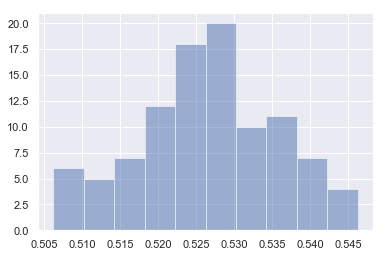

In [102]:
from os import path
from utils import accuracy
import operator

scores, medians = {}, {}
for f in ['PA-Team_100_realizations.npy']:
    team = path.basename(f).split('_')[0]
    y_preds = np.load(f)
    scores[team] = get_accuracies(y_preds)
    print(scores)
    medians[team] = np.median(scores[team])
    plt.hist(pd.Series(scores[team]), alpha=0.5)

for t, m in sorted(medians.items(), key=operator.itemgetter(1), reverse=True):
    print("{:20s}{:.4f}".format(t, m))

In [94]:
from sklearn.metrics import confusion_matrix
confuse_matrix = confusion_matrix(np.load('PA-Team_100_realizations.npy'), y_blind)
sns.heatmap(confuse_matrix, annot=True, fmt="d")

ValueError: Found input variables with inconsistent numbers of samples: [100, 830]

## Previous validation approach

In [77]:
validation_data = pd.read_csv('data/validation_data_nofacies.csv')
validation_data_facies = pd.read_csv('data/validation_data_facies.csv')

In [42]:

validation_data_all = pd.merge(validation_data, validation_data_facies, on='Depth')

In [43]:
validation_data_all = validation_data_all[validation_data_all['LithCode'] < 10]
validation_data_all.shape

(1042, 13)

In [20]:
validation_x = validation_data_all[[ 'GR', 'ILD_log10', 'DeltaPHI', 'PHIND', 'PE', 'NM_M','RELPOS', 'Depth']]
validation_y = validation_data_all['LithCode']

In [21]:
etc = ExtraTreesClassifier(bootstrap=False, class_weight=None, criterion='gini',
           max_depth=12, max_features=None, max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=15, n_jobs=None,
           oob_score=False, random_state=1, verbose=0, warm_start=False)
etc.fit(X_train, y_train)

ExtraTreesClassifier(bootstrap=False, class_weight=None, criterion='gini',
           max_depth=12, max_features=None, max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=15, n_jobs=None,
           oob_score=False, random_state=1, verbose=0, warm_start=False)

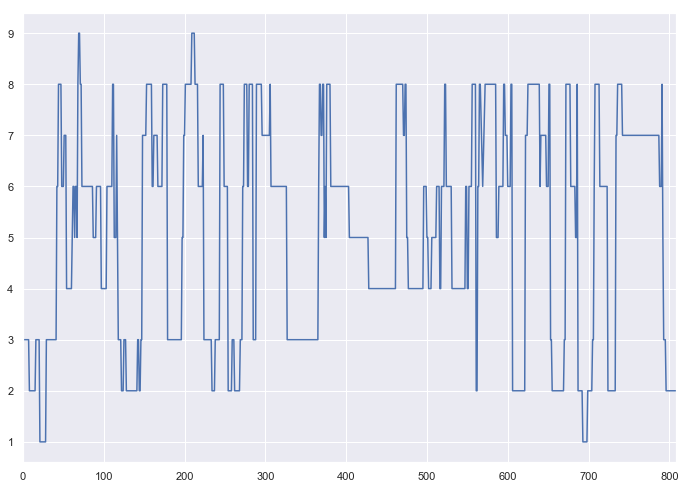

In [24]:
validation_data_all['LithCode'].plot()

In [ ]:
validation_x.columns

In [ ]:
X.columns

In [ ]:
validation_y.unique()

In [22]:
ytest_predict = etc.predict(validation_x)

f1_score(validation_y, ytest_predict, average='micro')

#ytest_predict
#validation_y

0.135

NameError: name 'validation_y' is not defined

In [46]:
PRED = pd.read_csv('data/prediction_depths.csv')
PRED.set_index(["Well Name", "Depth"], inplace=True)
PRED.head()

Unnamed: 0
Well Name Depth             
STUART    2808.0           0
          2808.5           1
          2809.0           2
          2809.5           3
          2810.0           4

In [47]:
TRUE = pd.read_csv('data/blind_stuart_crawford_core_facies.csv')
TRUE.rename(columns={'Depth.ft': 'Depth'}, inplace=True)
TRUE.rename(columns={'WellName': 'Well Name'}, inplace=True)
TRUE.set_index(["Well Name", "Depth"], inplace=True)
TRUE.head()

LithCode     LithLabel
Well Name Depth                         
STUART    2807.5         3  NM Shly Silt
          2808.0         3  NM Shly Silt
          2808.5         3  NM Shly Silt
          2809.0         3  NM Shly Silt
          2809.5         3  NM Shly Silt

In [48]:
def get_accuracies(y_preds):
    """
    Get the F1 scores from all the y_preds.
    y_blind is a 1D array. y_preds is a 2D array.
    """
    accs = []
    for y_pred in y_preds:
        PRED['Facies'] = y_pred
        all_data = PRED.join(TRUE, how='inner')
        y_blind = all_data['LithCode'].values
        y_pred = all_data['Facies'].values
        y_pred = y_pred[y_blind!=11]
        y_blind = y_blind[y_blind!=11]
        cv_conf = confusion_matrix(y_blind, y_pred)
        accs.append(accuracy(cv_conf))
    return np.array(accs)

In [49]:
get_accuracies(y_preds)

NameError: name 'y_preds' is not defined

In [50]:
test_data = pd.read_csv('data/validation_data_nofacies.csv')